In [1]:
import numpy as np
import pandas as pd
from statistics import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load dataset
df = pd.read_csv("FINAL_DATA.csv")

In [3]:
#Summary of N/A Value
df.isnull().sum()

team                0
result            324
margin            357
br               5572
toss             3946
bat              3946
opposition          0
ground              0
date                0
url                 0
scrapped_date       0
dtype: int64

In [4]:
df['toss'] = df['toss'].map( {'lost':0, 'won':1,})

In [5]:
df['result'] = df['result'].map( {'lost':0, 'won':1,})

In [6]:
df['bat'] = df['bat'].map( {'1st':1, '2nd':2,})

In [7]:
df=df.drop(['url','scrapped_date'],axis=1)

In [8]:
import os
def to_int(x):
    '''
    This function will try to convert a string into an integer if it is possible,
    else it will remain as np.nan
    '''
    try:
        return int(x)
    except:
        return np.nan
df['br'] = df['br'].replace('-', np.nan)
df['br'] = df['br'].apply(lambda x : to_int(x))


In [9]:
df = df.bfill(axis=0)

In [10]:
df.isnull().sum()

team          0
result        0
margin        0
br            4
toss          0
bat           0
opposition    0
ground        0
date          0
dtype: int64

In [11]:
df

,team,result,margin,br,toss,bat,opposition,ground,date
0,Australia,1.0,5 wicke,42.0,1.0,2.0,England,Melbourne,1971
1,England,0.0,5 wicke,42.0,1.0,2.0,Australia,Melbourne,1971
2,England,1.0,6 wicke,35.0,1.0,2.0,Australia,Manchester,1972
3,Australia,0.0,6 wicke,35.0,1.0,2.0,England,Manchester,1972
4,Australia,1.0,5 wicke,21.0,1.0,2.0,England,Lord's,1972
...,...,...,...,...,...,...,...,...,...
8192,Ireland,0.0,7 wicke,28.0,1.0,1.0,Afghanistan,Dhabi,2021
8193,Bangladesh,1.0,120 run,NaN,0.0,1.0,West Indies,Chattogram,2021
8194,West Indies,0.0,120 run,NaN,0.0,1.0,Bangladesh,Chattogram,2021
8195,Afghanistan,1.0,36 run,NaN,0.0,1.0,Abu,Dhabi,2021


In [12]:
df.to_csv('Clean_data.csv', index = False)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8197 entries, 0 to 8196
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   team        8197 non-null   object 
 1   result      8197 non-null   float64
 2   margin      8197 non-null   object 
 3   br          8193 non-null   float64
 4   toss        8197 non-null   float64
 5   bat         8197 non-null   float64
 6   opposition  8197 non-null   object 
 7   ground      8197 non-null   object 
 8   date        8197 non-null   int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 576.5+ KB


In [14]:
#SWEETVIZ Repot
import sweetviz as sv
dataset_report = sv.analyze(df)
dataset_report.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [15]:
def team_plot(team,X,Hue,title,xlab,ylab):
    new_df = df.loc[df['team'] == team]
    plt.figure(figsize=(20,3), facecolor='w')
    sns.countplot(x=X,data=new_df,hue=Hue)
    plt.title(team+"'s " + title, size=20)
    plt.xlabel(xlab, size=10)
    plt.ylabel(ylab, size=10)
    plt.xticks(size=8)
    plt.yticks(size=8)
    return plt.show()

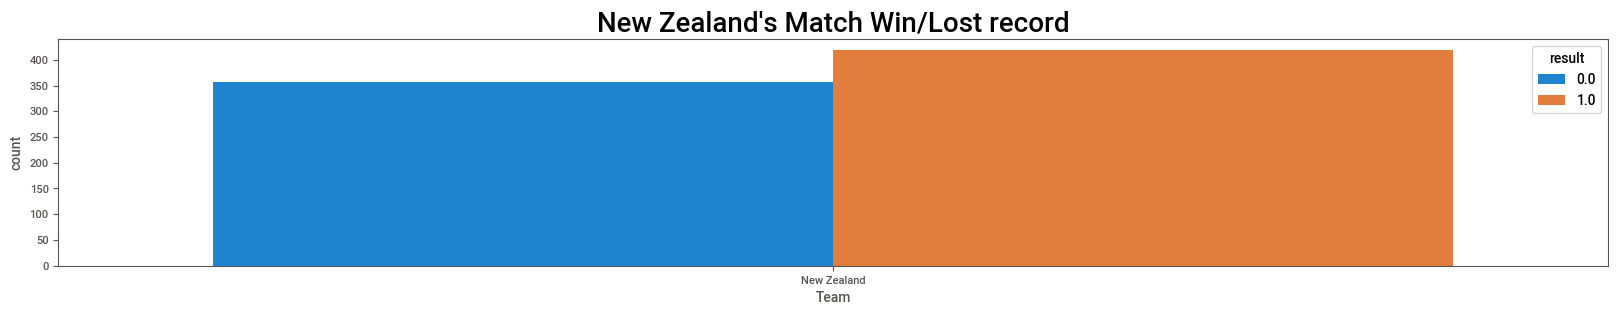

In [16]:
 team_plot("New Zealand","team","result", "Match Win/Lost record","Team","count")

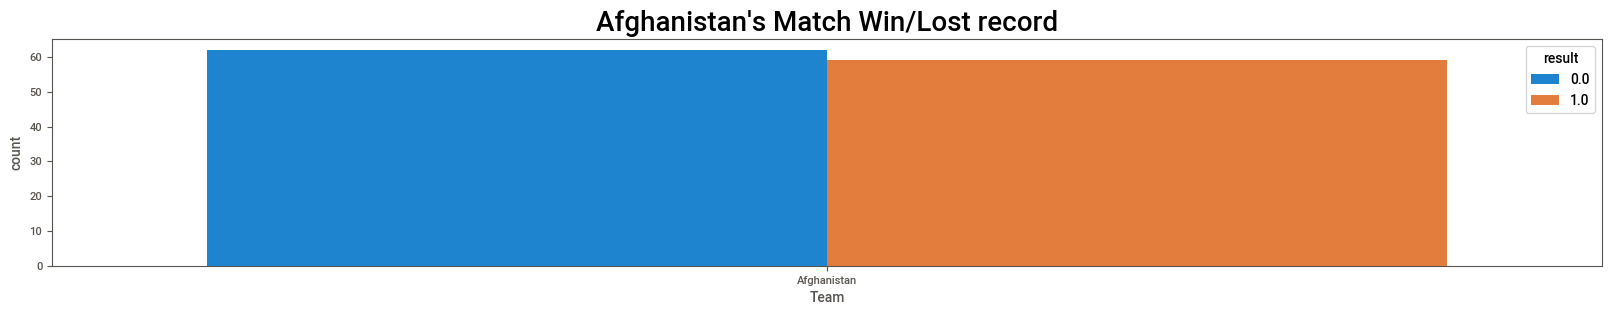

In [17]:
 team_plot("Afghanistan","team","result","Match Win/Lost record","Team","count")

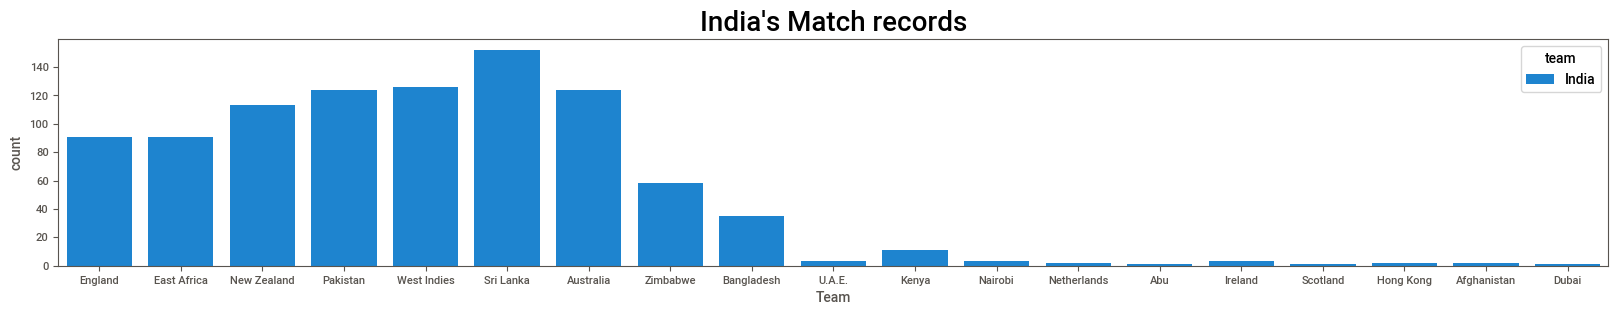

In [18]:
team_plot("India","opposition","team","Match records","Team","count")

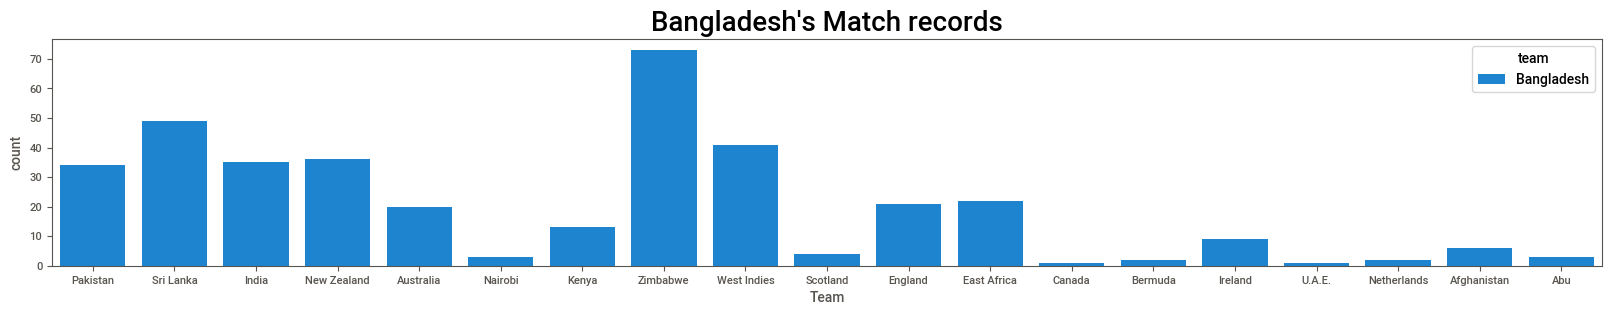

In [19]:
team_plot("Bangladesh","opposition","team","Match records","Team","count")

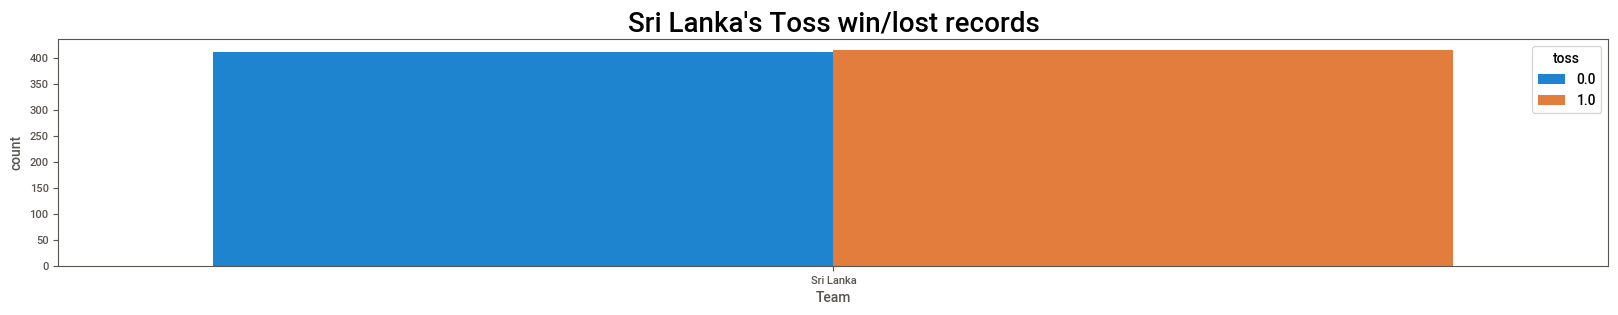

In [20]:
team_plot("Sri Lanka","team","toss","Toss win/lost records","Team","count")

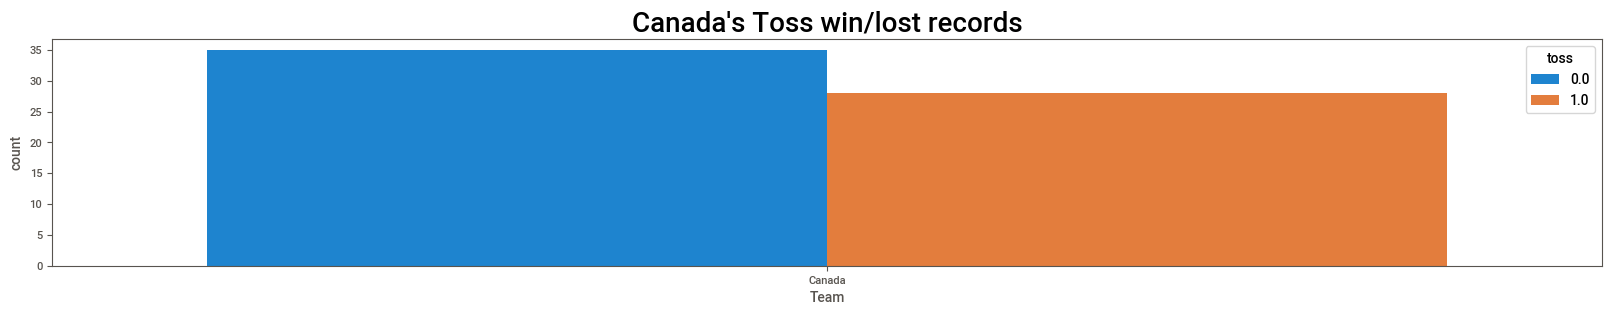

In [21]:
team_plot("Canada","team","toss","Toss win/lost records","Team","count")

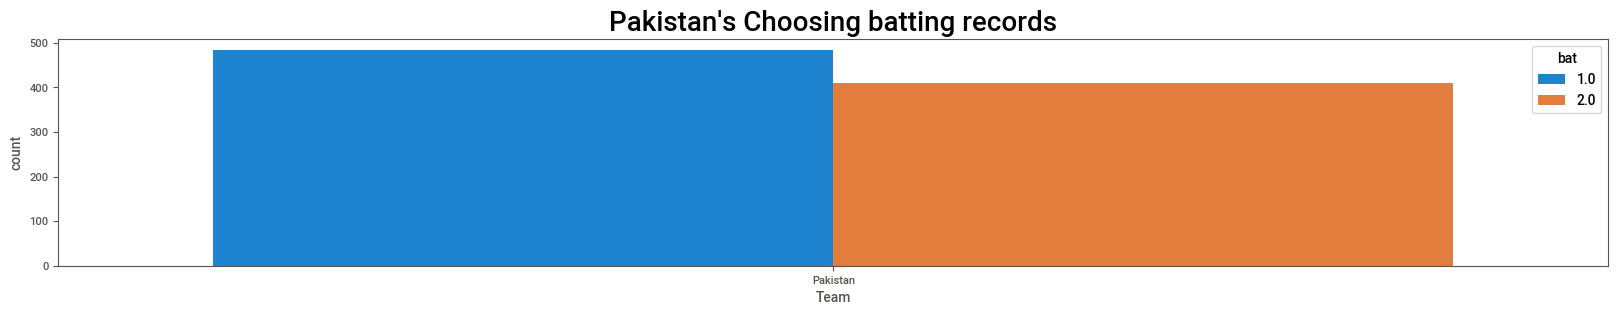

In [22]:
team_plot("Pakistan","team","bat","Choosing batting records","Team","count")

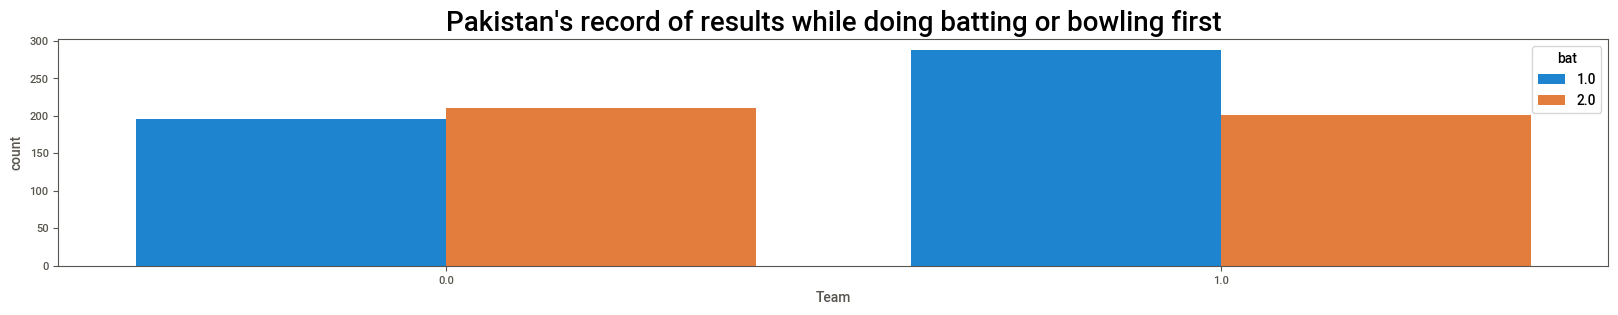

In [23]:
team_plot("Pakistan","result","bat","record of results while doing batting or bowling first","Team","count")

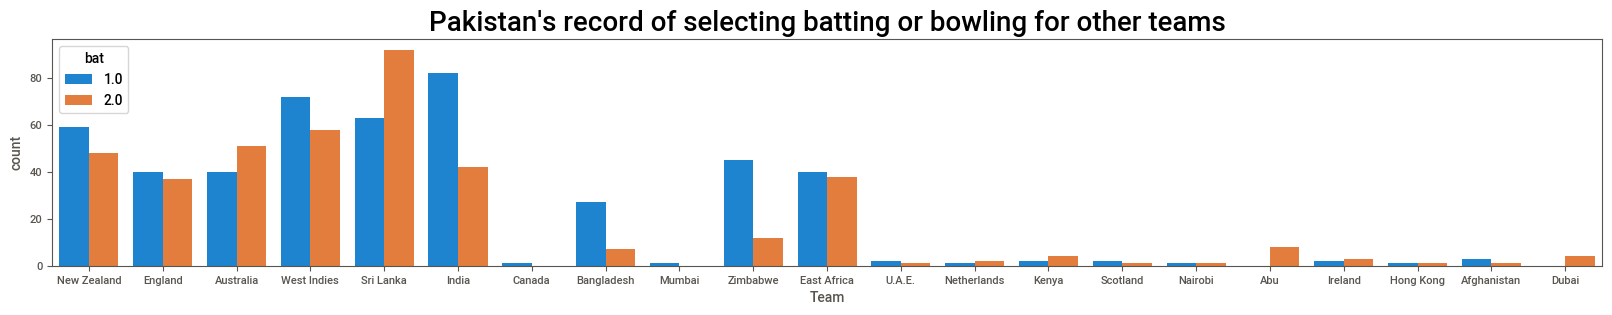

In [24]:
team_plot("Pakistan","opposition","bat","record of selecting batting or bowling for other teams","Team","count")

In [25]:
def groupby(team):
    group_df = df.loc[df['team'] == team]
    grouped_df = group_df.groupby("opposition")
    grouped_lists = grouped_df["ground"].apply(list)
    grouped_lists = grouped_lists.reset_index()
    return grouped_lists

In [26]:
groupby("India")

,opposition,ground
0,Abu,[Dhabi]
1,Afghanistan,"[Dhaka, Southampton]"
2,Australia,"[Melbourne, Sydney, Sydney, Melbourne, Sydney,..."
3,Bangladesh,"[Chattogram, Chandigarh, Sharjah, Colombo, Dha..."
4,Dubai,[Dubai]
5,East Africa,"[Leeds, Kolkata, Gwalior, Delhi, Adelaide, Tow..."
6,England,"[Leeds, Oval, Lord's, Ahmedabad, Jalandhar, Cu..."
7,Hong Kong,"[Karachi, Dubai]"
8,Ireland,"[Belfast, Bengaluru, Hamilton]"
9,Kenya,"[Cuttack, Bengaluru, Gwalior, Kolkata, Bristol..."


In [27]:
groupby("Zimbabwe")

,opposition,ground
0,Afghanistan,"[Bulawayo, Bulawayo, Bulawayo, Bulawayo, Bulaw..."
1,Australia,"[Nottingham, Southampton, Chennai, Cuttack, Ho..."
2,Bangladesh,"[Dhaka, Dhaka, Harare, Harare, Bulawayo, Chatt..."
3,Canada,[Nagpur]
4,East Africa,"[Canberra, Bengaluru, Harare, Harare, Centurio..."
5,England,"[Albury, Sydney, Brisbane, Bulawayo, Harare, H..."
6,Hong Kong,[Bulawayo]
7,India,"[Leicester, Mumbai, Ahmedabad, Hamilton, Harar..."
8,Ireland,"[Harare, Harare, Harare, Hobart, Harare, Harar..."
9,Kenya,"[Patna, Nairobi, Nairobi, Dhaka, Dhaka, Dhaka,..."


In [28]:
def ground_count(team):
    group_df = df.loc[df['team'] == team]
    ground_count = group_df.groupby(["opposition","ground"])["ground"].count()
    return print(ground_count)

In [29]:
ground_count("Netherlands")

opposition   ground       
Afghanistan  Amstelveen       2
             Hague            1
             Rotterdam        1
             Sharjah          2
Australia    Basseterre       1
             Potchefstroom    1
Bangladesh   Chattogram       1
             Glasgow          1
Bermuda      Amstelveen       1
             Benoni           1
             Nairobi          1
             Potchefstroom    2
             Rotterdam        2
Canada       Amstelveen       1
             Benoni           1
             Maunganui        1
             Nairobi          1
             Potchefstroom    1
             Rotterdam        1
             Toronto          1
East Africa  Amstelveen       1
             Basseterre       1
             Mohali           1
             Rawalpindi       1
England      London           1
             Nagpur           1
             Peshawar         1
India        Delhi            1
             Paarl            1
Ireland      Amstelveen       2
             

In [30]:
df[(df.team == 'India') & (df.result == 1.0)]

,team,result,margin,br,toss,bat,opposition,ground,date
46,India,1.0,10 wicke,181.0,0.0,2.0,East Africa,Leeds,1975
102,India,1.0,4 run,139.0,1.0,1.0,Pakistan,Quetta,1978
188,India,1.0,66 run,16.0,0.0,1.0,Australia,Melbourne,1980
192,India,1.0,5 run,40.0,1.0,1.0,New Zealand,Perth,1980
200,India,1.0,6 run,174.0,1.0,1.0,New Zealand,Adelaide,1980
...,...,...,...,...,...,...,...,...,...
8091,India,1.0,7 wicke,15.0,0.0,1.0,Australia,Bengaluru,2020
8133,India,1.0,71 run,133.0,1.0,1.0,East Africa,Dharamsala,2020
8139,India,1.0,6 wicke,133.0,0.0,1.0,East Africa,Lucknow,2020
8141,India,1.0,6 wicke,133.0,0.0,1.0,East Africa,Kolkata,2020


In [31]:
def ww(te,re):
    group_df = df[(df.team == te) & (df.result == re)]
    ground_count = group_df.groupby(["opposition","ground","result"])["ground"].count()
    return print(ground_count)

In [32]:
ww("India",1.0)

opposition   ground       result
Abu          Dhabi        1.0       1
Afghanistan  Dhaka        1.0       1
             Southampton  1.0       1
Australia    Adelaide     1.0       2
             Ahmedabad    1.0       2
                                   ..
Zimbabwe     Pune         1.0       1
             Rajkot       1.0       1
             Sharjah      1.0       4
             Singapore    1.0       1
             Vadodara     1.0       1
Name: ground, Length: 298, dtype: int64


In [33]:
ww("Netherlands",0.0)

opposition   ground         result
Afghanistan  Amstelveen     0.0       1
             Hague          0.0       1
             Rotterdam      0.0       1
             Sharjah        0.0       1
Australia    Basseterre     0.0       1
             Potchefstroom  0.0       1
Bangladesh   Chattogram     0.0       1
Bermuda      Benoni         0.0       1
East Africa  Amstelveen     0.0       1
             Basseterre     0.0       1
             Mohali         0.0       1
             Rawalpindi     0.0       1
England      London         0.0       1
             Nagpur         0.0       1
             Peshawar       0.0       1
India        Delhi          0.0       1
             Paarl          0.0       1
Ireland      Amstelveen     0.0       2
             Belfast        0.0       1
             Dublin         0.0       3
             Kolkata        0.0       1
Kenya        Lincoln        0.0       1
             Nairobi        0.0       2
Nairobi      Nairobi        0.0       1
Nepal

In [34]:
def br_g_plot(te,b,X,Hue,title,xlab,ylab):
    new_df = df[(df.team == te) & (df.br >= b)]
    plt.figure(figsize=(20,3), facecolor='w')
    sns.countplot(x=X,data=new_df,hue=Hue)
    plt.title(te+"'s " + title, size=20)
    plt.xlabel(xlab, size=10)
    plt.ylabel(ylab, size=10)
    plt.xticks(size=8)
    plt.yticks(size=8)
    return plt.show()

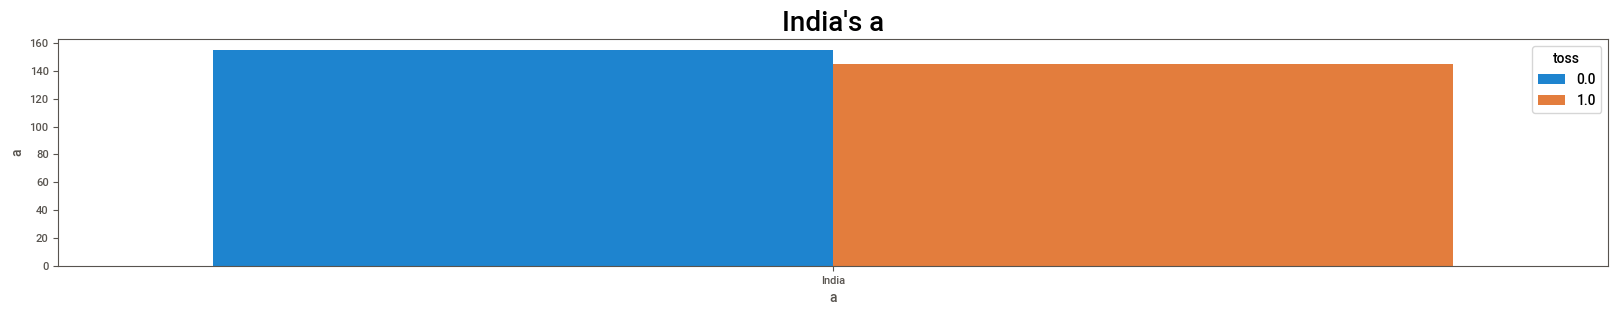

In [35]:
br_g_plot("India",50,"team","toss","a","a","a")

In [36]:
df.team

0         Australia
1           England
2           England
3         Australia
4         Australia
           ...     
8192        Ireland
8193     Bangladesh
8194    West Indies
8195    Afghanistan
8196        Ireland
Name: team, Length: 8197, dtype: object

In [37]:
df[df['team'].isin(['Australia'])]

,team,result,margin,br,toss,bat,opposition,ground,date
0,Australia,1.0,5 wicke,42.0,1.0,2.0,England,Melbourne,1971
3,Australia,0.0,6 wicke,35.0,1.0,2.0,England,Manchester,1972
4,Australia,1.0,5 wicke,21.0,1.0,2.0,England,Lord's,1972
7,Australia,0.0,2 wicke,21.0,1.0,2.0,England,Birmingham,1972
18,Australia,1.0,7 wicke,85.0,0.0,2.0,New Zealand,Dunedin,1974
...,...,...,...,...,...,...,...,...,...
8162,Australia,0.0,24 run,2.0,0.0,2.0,England,Manchester,2020
8163,Australia,1.0,3 wicke,2.0,1.0,1.0,England,Manchester,2020
8169,Australia,1.0,66 run,6.0,1.0,1.0,India,Sydney,2020
8171,Australia,1.0,51 run,6.0,1.0,1.0,India,Sydney,2020


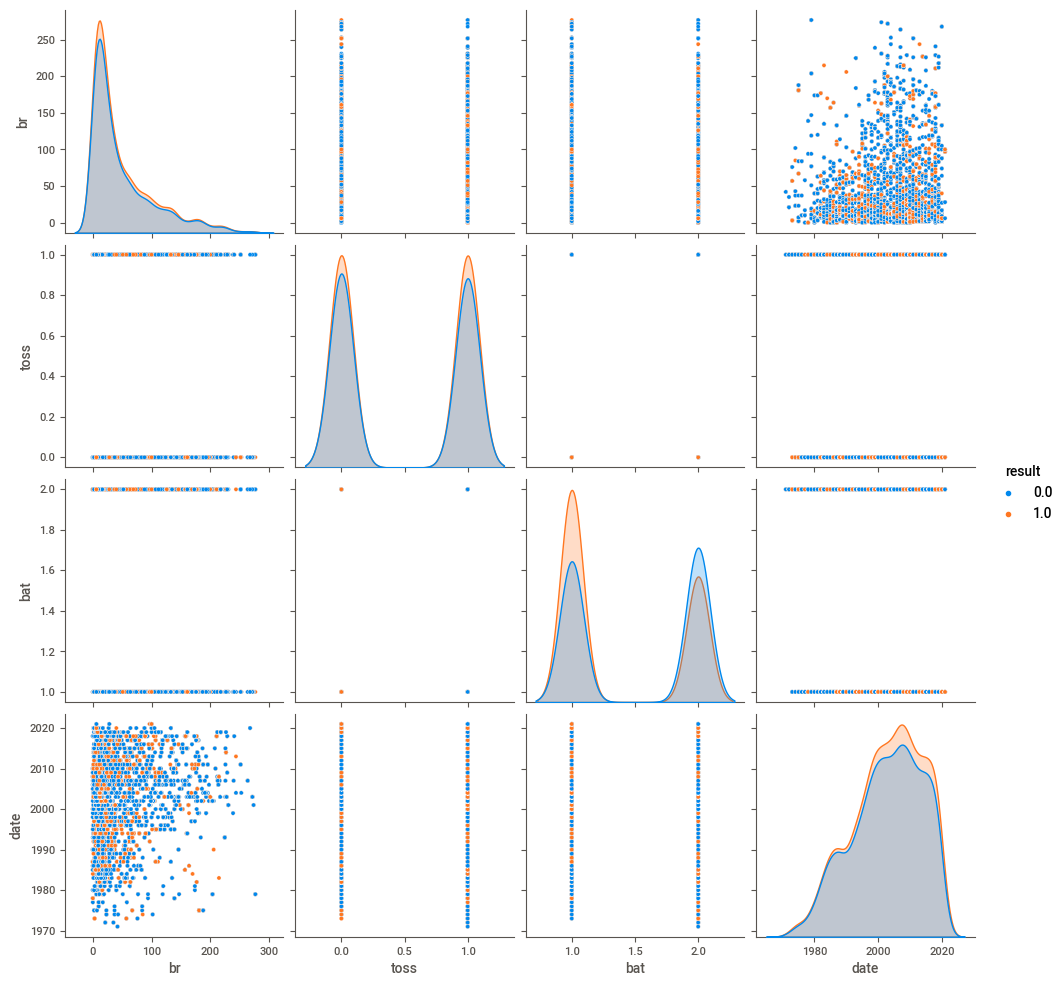

In [38]:
sns.pairplot(df, hue='result')

In [41]:
df.ground.value_counts()

Sharjah       480
Dhaka         338
Colombo       330
Sydney        316
Melbourne     312
             ... 
Bready          2
Launceston      2
Berri           2
Plymouth        2
Vijayawada      2
Name: ground, Length: 165, dtype: int64

In [104]:
raw_df = pd.read_csv('./raw_data.csv')

In [105]:
raw_df.drop(columns=['Unnamed: 0', 'margin', 'date'], inplace=True)

In [106]:
import catboost as cb
X= raw_df.drop(columns='result')
y= raw_df['result']

In [125]:
!pip3 install dython

In [126]:
from dython.nominal import associations

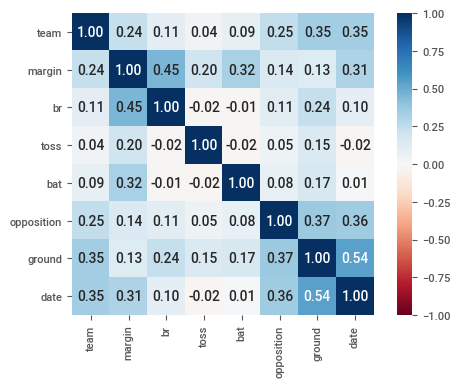

In [129]:
fig = associations(X, cmap = 'RdBu')

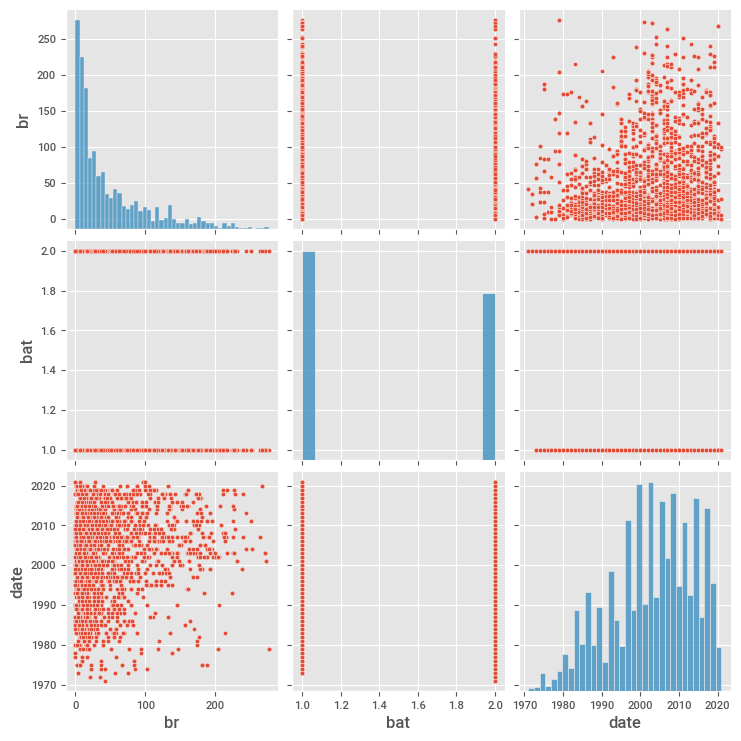

In [131]:
sns.pairplot(X.drop(columns='toss'))

In [108]:
np.where(X.dtypes != np.float)[0]

array([0, 4, 5], dtype=int64)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def train(X, y):
    dataset = cb.Pool(X, y, cat_features=np.where(X.dtypes != np.float)[0])
    model = cb.CatBoostClassifier()
    model.fit(dataset, verbose=2)
    
    return model

In [115]:
model = train(X_train, y_train)

Learning rate set to 0.005334
0:	learn: 0.6913578	total: 14.4ms	remaining: 14.4s
2:	learn: 0.6879880	total: 42.6ms	remaining: 14.2s
4:	learn: 0.6843222	total: 76.5ms	remaining: 15.2s
6:	learn: 0.6810528	total: 99ms	remaining: 14s
8:	learn: 0.6775816	total: 122ms	remaining: 13.5s
10:	learn: 0.6749223	total: 142ms	remaining: 12.8s
12:	learn: 0.6713892	total: 165ms	remaining: 12.5s
14:	learn: 0.6683665	total: 185ms	remaining: 12.1s
16:	learn: 0.6652405	total: 215ms	remaining: 12.4s
18:	learn: 0.6620106	total: 247ms	remaining: 12.7s
20:	learn: 0.6592834	total: 270ms	remaining: 12.6s
22:	learn: 0.6565173	total: 291ms	remaining: 12.4s
24:	learn: 0.6536952	total: 314ms	remaining: 12.2s
26:	learn: 0.6508063	total: 337ms	remaining: 12.2s
28:	learn: 0.6482283	total: 365ms	remaining: 12.2s
30:	learn: 0.6454723	total: 397ms	remaining: 12.4s
32:	learn: 0.6429300	total: 422ms	remaining: 12.4s
34:	learn: 0.6401154	total: 464ms	remaining: 12.8s
36:	learn: 0.6379971	total: 502ms	remaining: 13.1s
38:	le

336:	learn: 0.4753360	total: 4.04s	remaining: 7.96s
338:	learn: 0.4751127	total: 4.07s	remaining: 7.93s
340:	learn: 0.4746674	total: 4.08s	remaining: 7.89s
342:	learn: 0.4737861	total: 4.11s	remaining: 7.87s
344:	learn: 0.4730355	total: 4.13s	remaining: 7.84s
346:	learn: 0.4726533	total: 4.15s	remaining: 7.81s
348:	learn: 0.4722142	total: 4.17s	remaining: 7.79s
350:	learn: 0.4720295	total: 4.19s	remaining: 7.75s
352:	learn: 0.4716320	total: 4.2s	remaining: 7.7s
354:	learn: 0.4711550	total: 4.23s	remaining: 7.68s
356:	learn: 0.4707020	total: 4.26s	remaining: 7.67s
358:	learn: 0.4702288	total: 4.28s	remaining: 7.64s
360:	learn: 0.4699999	total: 4.29s	remaining: 7.6s
362:	learn: 0.4697938	total: 4.31s	remaining: 7.57s
364:	learn: 0.4690762	total: 4.34s	remaining: 7.55s
366:	learn: 0.4684220	total: 4.35s	remaining: 7.51s
368:	learn: 0.4679772	total: 4.37s	remaining: 7.47s
370:	learn: 0.4675317	total: 4.39s	remaining: 7.44s
372:	learn: 0.4671863	total: 4.4s	remaining: 7.4s
374:	learn: 0.466

668:	learn: 0.4024065	total: 7.92s	remaining: 3.92s
670:	learn: 0.4022066	total: 7.95s	remaining: 3.9s
672:	learn: 0.4018445	total: 7.98s	remaining: 3.88s
674:	learn: 0.4015550	total: 8.02s	remaining: 3.86s
676:	learn: 0.4013369	total: 8.04s	remaining: 3.84s
678:	learn: 0.4008101	total: 8.06s	remaining: 3.81s
680:	learn: 0.4004766	total: 8.09s	remaining: 3.79s
682:	learn: 0.4000266	total: 8.12s	remaining: 3.77s
684:	learn: 0.3995372	total: 8.15s	remaining: 3.75s
686:	learn: 0.3992867	total: 8.17s	remaining: 3.72s
688:	learn: 0.3991657	total: 8.19s	remaining: 3.7s
690:	learn: 0.3988390	total: 8.21s	remaining: 3.67s
692:	learn: 0.3984539	total: 8.24s	remaining: 3.65s
694:	learn: 0.3982571	total: 8.27s	remaining: 3.63s
696:	learn: 0.3979193	total: 8.29s	remaining: 3.6s
698:	learn: 0.3974939	total: 8.31s	remaining: 3.58s
700:	learn: 0.3972055	total: 8.35s	remaining: 3.56s
702:	learn: 0.3970143	total: 8.38s	remaining: 3.54s
704:	learn: 0.3967911	total: 8.41s	remaining: 3.52s
706:	learn: 0.3

996:	learn: 0.3487502	total: 11.9s	remaining: 35.9ms
998:	learn: 0.3483856	total: 12s	remaining: 12ms
999:	learn: 0.3480526	total: 12s	remaining: 0us


In [121]:
from sklearn.metrics import classification_report

print("Training Accuracy")
print(classification_report(y_train, model.predict(X_train)))

print("Testing Accuracy")
print(classification_report(y_test, model.predict(X_test)))

Training Accuracy
              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81       126
         1.0       0.73      0.75      0.74        88

    accuracy                           0.78       214
   macro avg       0.77      0.78      0.77       214
weighted avg       0.78      0.78      0.78       214

Testing Accuracy
              precision    recall  f1-score   support

         0.0       0.64      0.70      0.67        30
         1.0       0.57      0.50      0.53        24

    accuracy                           0.61        54
   macro avg       0.60      0.60      0.60        54
weighted avg       0.61      0.61      0.61        54



evaluating params={'learning_rate': 0.8370106458894697, 'depth': 0, 'l2_leaf_reg': 8.835837790286535, 'task_type': 'GPU', 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'custom_metric': ['AUC'], 'iterations': 50, 'random_seed': 20181224}
evaluated score=0.5                                   
evaluated 1 times                                     
evaluating params={'learning_rate': 0.8414600898588487, 'depth': 3, 'l2_leaf_reg': 3.841780975474402, 'task_type': 'GPU', 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'custom_metric': ['AUC'], 'iterations': 50, 'random_seed': 20181224}
evaluated score=0.8200893352429072                                
evaluated 2 times                                                 
evaluating params={'learning_rate': 0.4234185321620083, 'depth': 5, 'l2_leaf_reg': 9.464266235679002, 'task_type': 'GPU', 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'custom_metric': ['AUC'], 'iterations': 50, 'random_seed': 20181224}
evaluated score=0.847522820035616

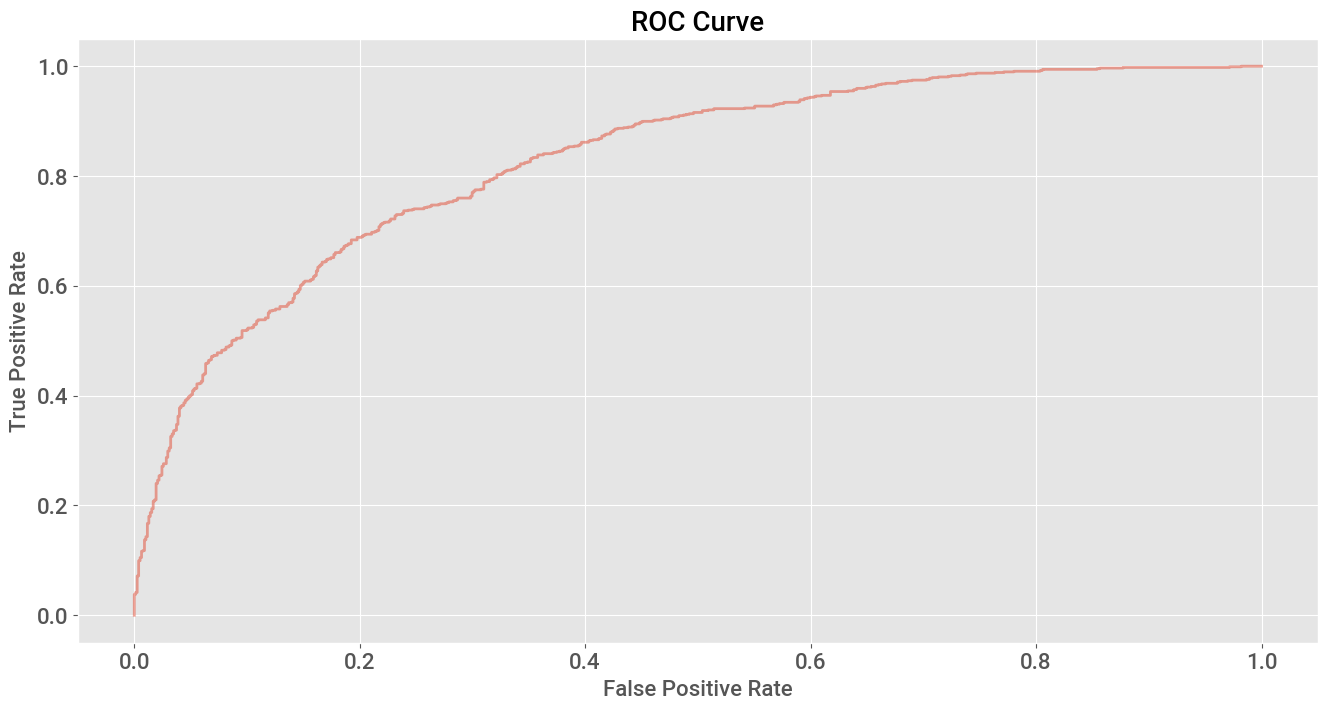

<AxesSubplot:ylabel='Feature Id'>

<Figure size 600x400 with 0 Axes>

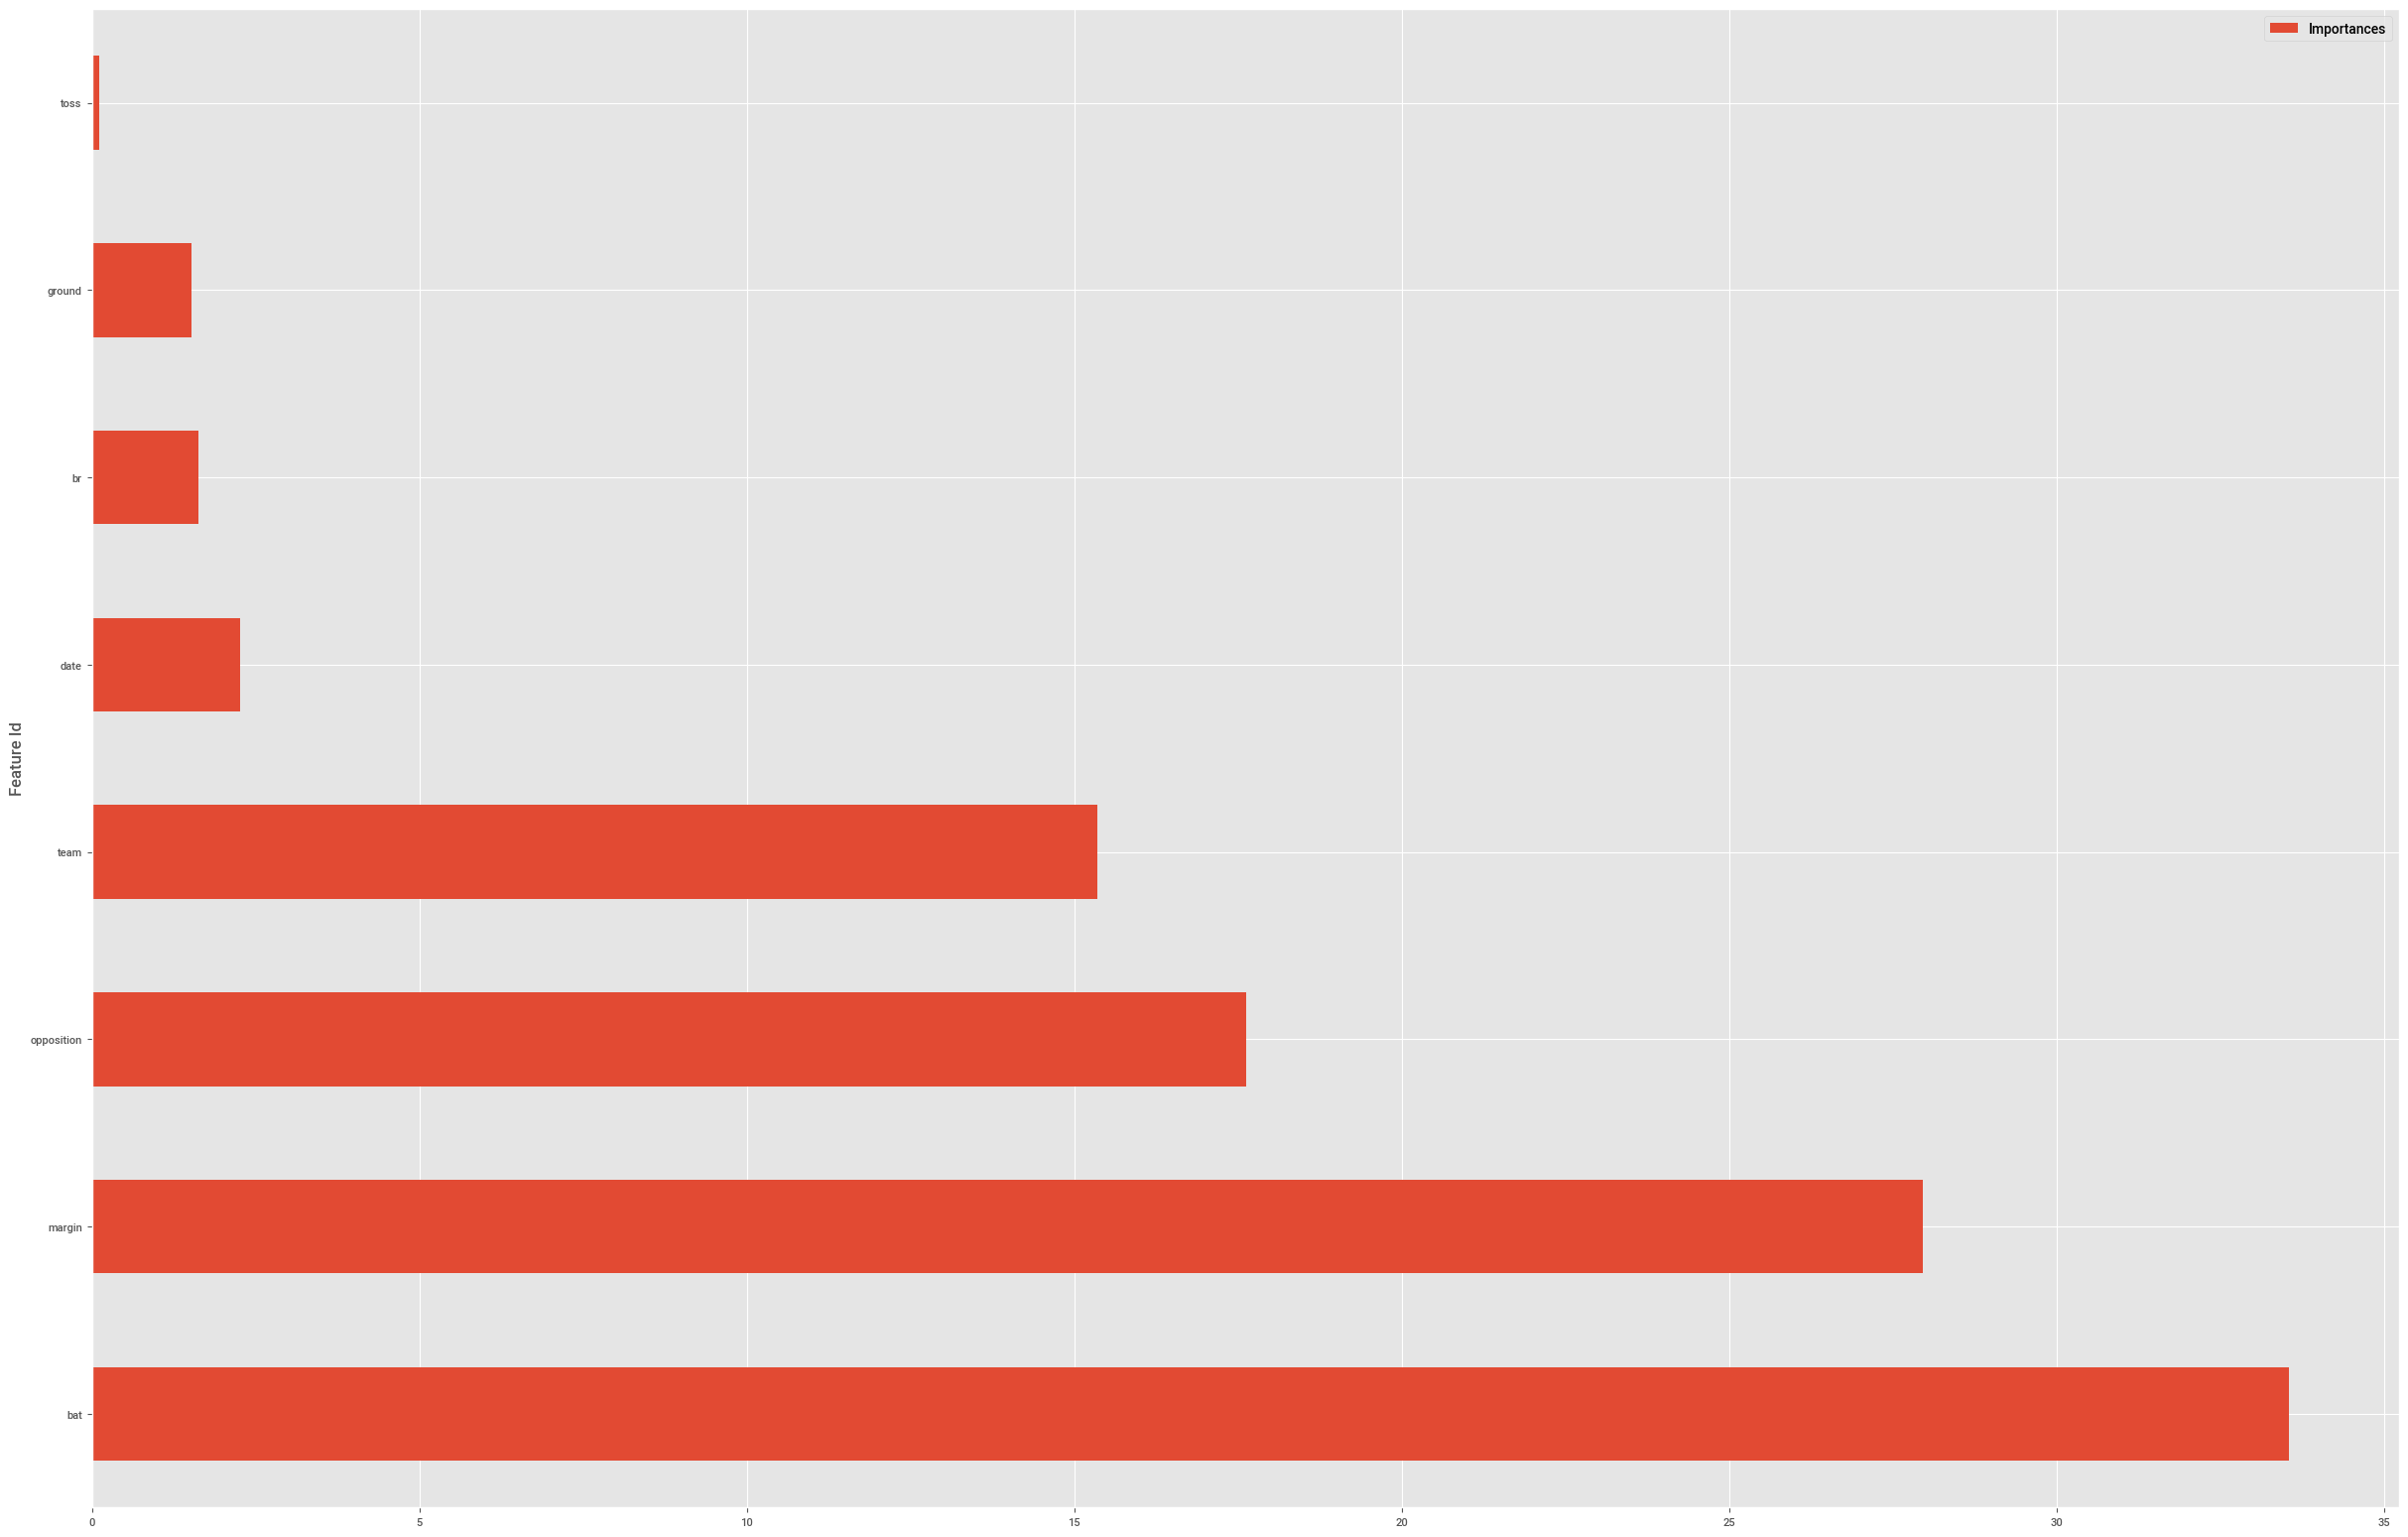

In [122]:
import catboost as cb
import catboost.utils as cbu
import numpy as np
import pandas as pd
import hyperopt
import sys
from sklearn.model_selection import train_test_split


# + pycharm={"name": "#%%\n"}
# Splitting df into data and label
X = df.drop(columns=['result'])
y = df['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

X_test.head()


class UciAdultClassifierObjective(object):
    def __init__(self, dataset, const_params, fold_count):
        self._dataset = dataset
        self._const_params = const_params.copy()
        self._fold_count = fold_count
        self._evaluated_count = 0

    def _to_catboost_params(self, hyper_params):
        return {
            'learning_rate': hyper_params['learning_rate'],
            'depth': hyper_params['depth'],
            'l2_leaf_reg': hyper_params['l2_leaf_reg']}

    # hyperopt optimizes an objective using `__call__` method
    def __call__(self, hyper_params):
        # join hyper-parameters provided by hyperopt with hyper-parameters
        params = self._to_catboost_params(hyper_params)
        params.update(self._const_params)

        print('evaluating params={}'.format(params), file=sys.stdout)
        sys.stdout.flush()

        # we use cross-validation for objective evaluation, to avoid overfitting
        scores = cb.cv(
            pool=self._dataset,
            params=params,
            fold_count=self._fold_count,
            partition_random_seed=20181224,
            verbose=False)

        max_mean_auc = np.max(scores['test-AUC-mean'])
        print('evaluated score={}'.format(max_mean_auc), file=sys.stdout)

        self._evaluated_count += 1
        print('evaluated {} times'.format(self._evaluated_count), file=sys.stdout)

        # negate because hyperopt minimizes the objective
        return {'loss': -max_mean_auc, 'status': hyperopt.STATUS_OK}


def find_best_hyper_params(dataset, const_params, max_evals=100):
    parameter_space = {
        'learning_rate': hyperopt.hp.uniform('learning_rate', 0.2, 1.0),
        'depth': hyperopt.hp.randint('depth', 7),
        'l2_leaf_reg': hyperopt.hp.uniform('l2_leaf_reg', 1, 10)}
    objective = UciAdultClassifierObjective(dataset=dataset, const_params=const_params, fold_count=6)
    trials = hyperopt.Trials()
    best = hyperopt.fmin(
        fn=objective,
        space=parameter_space,
        algo=hyperopt.rand.suggest,
        max_evals=max_evals,
        rstate=np.random.RandomState(seed=20181224))
    return best


def train_best_model(X, y, const_params, max_evals=100, use_default=False):
    # convert pandas.DataFrame to catboost.Pool to avoid converting it on each
    # iteration of hyper-parameters optimization
    dataset = cb.Pool(X, y, cat_features=np.where(X.dtypes != np.float)[0])

    if use_default:
        # pretrained optimal parameters
        best = {
            'learning_rate': 0.4234185321620083,
            'depth': 5,
            'l2_leaf_reg': 9.464266235679002}
    else:
        best = find_best_hyper_params(dataset, const_params, max_evals=max_evals)

    # merge subset of hyper-parameters provided by hyperopt with hyper-parameters
    hyper_params = best.copy()
    hyper_params.update(const_params)

    # drop `use_best_model` because we are going to use entire dataset for
    # training of the final model
    hyper_params.pop('use_best_model', None)

    model = cb.CatBoostClassifier(**hyper_params)
    model.fit(dataset, verbose=False)

    return model, hyper_params


have_gpu = True
# skip hyper-parameter optimization and just use provided optimal parameters
use_optimal_pretrained_params = False
# number of iterations of hyper-parameter search
hyperopt_iterations = 10

#%%
const_params = dict({
    'task_type': 'GPU' if have_gpu else 'CPU',
    'loss_function': 'Logloss',
    'eval_metric': 'AUC',
    'custom_metric': ['AUC'],
    'iterations': 50,
    'random_seed': 20181224})


#%%

model, params = train_best_model(
    X_train, y_train,
    const_params,
    max_evals=hyperopt_iterations,
    use_default=use_optimal_pretrained_params)
print('best params are {}'.format(params), file=sys.stdout)

def calculate_score_on_dataset_and_show_graph(X, y, model):
    import sklearn.metrics
    import matplotlib.pylab as pl
    pl.style.use('ggplot')

    dataset = cb.Pool(X, y, cat_features=np.where(X.dtypes != np.float)[0])
    fpr, tpr, _ = cbu.get_roc_curve(model, dataset, plot=True)
    auc = sklearn.metrics.auc(fpr, tpr)
    return auc


calculate_score_on_dataset_and_show_graph(X_test, y_test, model)

# without CPT encoded
import matplotlib.pyplot as plt
fi = model.get_feature_importance(prettified=True)[:29]
fig = plt.figure()
fi.plot(kind='barh', x='Feature Id', y='Importances', figsize=(10,10))

# Commented out IPython magic to ensure Python compatibility.


In [123]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.74      0.80      0.77      3151
         1.0       0.80      0.74      0.77      3406

    accuracy                           0.77      6557
   macro avg       0.77      0.77      0.77      6557
weighted avg       0.77      0.77      0.77      6557



In [124]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.71      0.77      0.74       774
         1.0       0.78      0.72      0.75       866

    accuracy                           0.74      1640
   macro avg       0.74      0.75      0.74      1640
weighted avg       0.75      0.74      0.74      1640



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold, train_test_split
from tqdm import tqdm
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

df = pd.read_csv('/content/numerical_processed_data.csv')
df.set_index('index', inplace=True)

# Binary Classifier
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['target_binary', 'target_multiclass']),
                                                   df['target_binary'] ,test_size = 0.2, random_state=13)

class meta():
    # Note: if you change the target, don't forget to change the class weight
    target = 'target'

    # training meta data
    test_size = 0.30
    val_size = 0.25
    random_state = {'test': 20, 'val': 6}
    k_fold = 8
    scoring = 'f1'
    n_iter = 15


def train(classifiers, Xtrain, ytrain, meta, verbose=0):
    best_estimators = {}
    for clf, params in tqdm(classifiers.items()):

        # search across 100 different combinations, and use all available cores
        search_cv = RandomizedSearchCV(
            # pipline
            estimator = Pipeline(
                steps=[
                    ('clf', clf)
                ]
            ),

            # cross validation
            cv = KFold(
                n_splits = meta.k_fold,
                shuffle = True,
                random_state = meta.random_state['val']
            ),

            # parameters
            param_distributions = params,

            scoring = meta.scoring,
            n_iter = meta.n_iter,
            random_state = meta.random_state['val'],
            n_jobs = -1,
            verbose = verbose,
        )

        # fit model
        search_cv.fit(Xtrain, ytrain)

        # best params and model
        search_cv.best_params_
        best_estimator = search_cv.best_estimator_
        best_estimators[clf] = best_estimator.named_steps['clf']

    return best_estimators

classifiers = {

    DummyClassifier(strategy = 'stratified'): {
    },

    XGBClassifier(): {
        'clf__n_estimators': [25,50,75],
        'clf__max_depth': [2, 3,4,5,6,7,8,9,10],
        'clf__learning_rate': [0.0001, 0.001, 0.01],
        'clf__min_child_weight': list(range(1, 6, 2)),
        'clf__subsample': [i/10 for i in range(1, 10)],
        'clf__cosample_bytree': [i/10 for i in range(6, 10)],
        'clf__reg_alpha': [1e-5, 1e-2, 0.1, 1],
        'clf__reg_lamda': [1e-5, 1e-2, 0.1, 1],
        'clf__scale_pos_weight': [10,15,20,25,
                                  30,40, 50]
    },

    RandomForestClassifier(): {
        'clf__n_estimators': [25,50,75],
        'clf__bootstrap': [True, False],
        'clf__max_depth': [2,3,4,5,6,7,8,9,10],
        'clf__max_features': ['auto', 'sqrt'],
        'clf__min_samples_leaf': [1, 2, 3, 4],
        'clf__min_samples_split': [2, 5, 8, 10],
        'clf__class_weight': ['balanced',
                              {0:1, 1:2},
                              {0:1, 1:3},
                              {0:1,1:5},
                              {0:1,1:10}],
    },

    LogisticRegression(): {
        'clf__penalty' : ['l1', 'l2'],
        'clf__C' : np.logspace(-4, 4, 20),
        'clf__solver' : ['liblinear'],
        'clf__class_weight': [{0:0.001, 1:0.999},
                              {0:0.1, 1: 0.9},
                              {0:0.01, 1:0.99},
                              {0:0.15, 1:0.85},
                              ['balanced']],
    },

    LGBMClassifier():{
        'clf__n_estimators': [25,50,75],
        'clf__max_depth': [2, 3,4,5,6,7,8,9,10],
        'clf__learning_rate': [0.0001, 0.001, 0.01],
        'clf__min_child_weight': list(range(1, 6, 2)),
        'clf__subsample': [i/10 for i in range(1, 10)],
        'clf__cosample_bytree': [i/10 for i in range(6, 10)],
        'clf__reg_alpha': [1e-5, 1e-2, 0.1, 1],
        'clf__reg_lamda': [1e-5, 1e-2, 0.1, 1],
        'clf__scale_pos_weight': [10,15,20,25,
                                  30,40,50],
        'clf__is_unbalanced':[True]
    },

}



best_estimators = train(classifiers=classifiers, Xtrain= x_train, ytrain=y_train, meta=meta())

for estimator, clf in best_estimators.items():
  
  ######## TRAIN -- classification report and store predictions/ probabilities
  print(classification_report(y_train, clf.predict(x_train)))
        
  x_train[f'{estimator}_pred'] = clf.predict(x_train)
  x_train[f'{estimator}_proba'] = [p[1] for p in clf.predict_proba(x_train)]
  
  ######## TEST -- classification report and store predictions / probabilities
  print(classification_report(y_test, clf.predict(x_test)))
  
  x_test[f'{estimator}_pred'] =  clf.predict(x_test)
  x_test[f'{estimator}_proba'] = [p[1] for p in clf.predict_proba(x_test)]

In [64]:
multi_df = df[df['opposition'].isin(['Australia'])]

In [81]:
df.toss.value_counts()

0.0    4124
1.0    4073
Name: toss, dtype: int64

<AxesSubplot:xlabel='team', ylabel='count'>

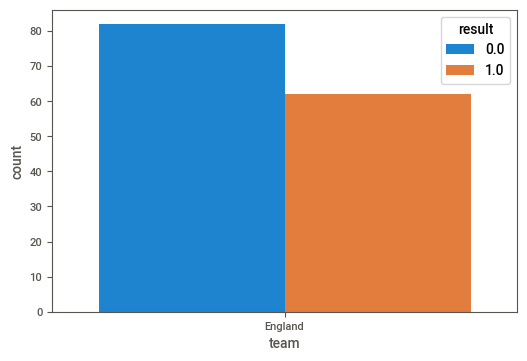

In [65]:
multi_df.head(10)

# multiselect == 4 teams 
# Sidebar === opposition == India

multi_df = multi_df[multi_df['team'].isin(['Australia', 'England'])]
sns.countplot(x='team', hue ='result', data= multi_df)

In [133]:
df.result.value_counts()

1.0    4272
0.0    3925
Name: result, dtype: int64